# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# загружаем датасет
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [ ]:
# получаем общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Название столбцов из описание данных:
*   *total_images* — число фотографий квартиры в объявлении
*   *last_price* — цена на момент снятия с публикации
*   *total_area* — общая площадь квартиры в квадратных метрах (м²)
*   *first_day_exposition* — дата публикации
*   *rooms* — число комнат
*   *ceiling_height* — высота потолков (м)
*   *floors_total* — всего этажей в доме
*   *living_area* — жилая площадь в квадратных метрах (м²)
*   *floor* — этаж
*   *is_apartment* — апартаменты (булев тип)
*   *studio* — квартира-студия (булев тип)
*   *open_plan* — свободная планировка (булев тип)
*   *kitchen_area* — площадь кухни в квадратных метрах (м²)
*   *balcony* — число балконов
*   *locality_name* — название населённого пункта
*   *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
*   *cityCenters_nearest* — расстояние до центра города (м)
*   *parks_around3000* — число парков в радиусе 3 км
*   *parks_nearest* — расстояние до ближайшего парка (м)
*   *ponds_around3000* — число водоёмов в радиусе 3 км
*   *ponds_nearest* — расстояние до ближайшего водоёма (м)
*   days_exposition — сколько дней было размещено объявление (от публикации до снятия)















In [ ]:
# получим общую информацию о данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [ ]:
# Проверим записи на наличие дубликатов
print('Количество явных дубликатов во всем датасете:', df.duplicated().sum())

Количество явных дубликатов во всем датасете: 0


In [ ]:
# для удобства отобразим все колонки таблицы
#pd.set_option('display.max_columns', None)
# посмотрим рандомную выборку данных
df.sample(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10453,18,3299000.0,38.00,2017-05-10T00:00:00,1,2.55,5.0,30.00,4,NaN,...,7.78,0.0,Санкт-Петербург,10541.0,12637.0,0.0,NaN,1.0,670.0,88.0
21979,18,3099000.0,50.50,2018-09-19T00:00:00,2,NaN,5.0,27.00,4,NaN,...,9.60,NaN,деревня Лупполово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
9303,8,1090000.0,31.00,2018-06-18T00:00:00,1,NaN,5.0,NaN,4,NaN,...,NaN,NaN,деревня Старые Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,45.0
13651,5,3390000.0,44.08,2018-09-17T00:00:00,1,NaN,3.0,12.18,2,NaN,...,16.80,NaN,Красное Село,26236.0,29661.0,3.0,95.0,2.0,319.0,45.0
17677,9,4400000.0,61.70,2017-08-10T00:00:00,3,2.50,5.0,48.25,5,NaN,...,5.20,4.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,6,4300000.0,47.10,2017-05-05T00:00:00,2,NaN,4.0,32.00,2,False,...,6.00,0.0,Санкт-Петербург,21462.0,3797.0,0.0,NaN,2.0,280.0,69.0
16981,20,21000000.0,122.00,2018-01-15T00:00:00,3,2.70,25.0,70.00,16,NaN,...,14.00,2.0,Санкт-Петербург,36827.0,12348.0,1.0,485.0,1.0,474.0,182.0
3254,16,8800000.0,80.00,2019-05-03T00:00:00,3,2.80,17.0,31.00,15,NaN,...,27.00,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22832,5,2600000.0,28.00,2018-12-14T00:00:00,0,2.60,16.0,16.80,9,NaN,...,NaN,NaN,Санкт-Петербург,19372.0,22796.0,0.0,NaN,1.0,406.0,NaN
3359,20,6900000.0,60.00,2017-02-16T00:00:00,3,NaN,5.0,NaN,2,False,...,NaN,1.0,Санкт-Петербург,15168.0,10080.0,0.0,NaN,1.0,466.0,60.0


In [ ]:
#df.hist(figsize=(15, 15))

## Выводы предварительного анализа общей информации

*   Присутствуют столбцы с некорректными типами данных: *is_apartment* заявлен как булевый тип, а в датасете 'object', *first_day_exposition* - 'object' вместо 'datetime', и т.д.
*   В данных множество пропусков
*   Очевидно присутствуют вылеты в данных и аномальные значения: высота потолков (ceiling_height) = 100м.; расстояние до ближайшего аэропорта (airports_nearest) = 0м. и т.д.
*   В целом данные читаются и готовы для предобработки




# Предобработка данных

In [ ]:
# приведем названия столбцов к "змеиному" стилю
df = df.rename(columns={'parks_around3000':'parks_around_3000',
                        'ponds_around3000':'ponds_around_3000',
                        'cityCenters_nearest':'city_centers_nearest'})

## Работа с пропусками в данных






In [ ]:
# посчитаем процентное количество пропусков в каждом столбце
(df.isnull().mean() * 100).sort_values(ascending=False).round(1)

is_apartment            88.3
parks_nearest           65.9
ponds_nearest           61.6
balcony                 48.6
ceiling_height          38.8
airports_nearest        23.4
city_centers_nearest    23.3
ponds_around_3000       23.3
parks_around_3000       23.3
days_exposition         13.4
kitchen_area             9.6
living_area              8.0
floors_total             0.4
locality_name            0.2
total_images             0.0
last_price               0.0
studio                   0.0
floor                    0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
open_plan                0.0
dtype: float64

**is_apartment** - наибольшее количество пропусков в этом столбце. Произойти это могло из-за того, что не все размещающие обьявления имеют представление о разнице квартир и апартаментов, а так же этот параметр мог не указываться умышленно (для ввода в заблуждение из-за той же разницы между квартирами и апартаментами). Так как параметр логического типа и отсутствуют более 88% значений, заполнение пропусков на основе имеющихся данных не корректно. Здесь и далее для удобства дальнейших расчетов и визуализаций промаркируем пропуски в данных например значением '-1' и попробуем привести к целочисленному типу данных

**parks_nearest** и **ponds_nearest** как и **parks_around_3000** и **ponds_around_3000** не самые важные параметры. Могли не указываться в связи с отсутствием поблизости парков и водоемов либо неизвестностью о наличии таких. Смущает почти одинаковый процент пропусков в паре 'parks_around_3000',  'ponds_around_3000', '**airports_nearest**' и '**city_centers_nearest**'. Проверим.

**balcony** - можно предположить что отсутствующее значение тождественно отсутствующему балкону

**ceiling_height** - достаточно характерный параметр и заменять его медианным значением (2.77м) которое выглядит вполне адекватно для жилых помещений некорректно. Так же отметим что выборке явно присутствую аномальные значения (1м, 100м).

**days_exposition** - вероятно часть пропусков возникли из-за того, что объявление еще находилось в состоянии публикации на момент выгрузки данных. Высчитаем разницу между датой публикации и последней датой записей (будем считать ее датой выгрузки датасета), и заполним пустые значения.

**kitchen_area** и **living_area** - вероятно параметры могли не указываться в случаях когда тяжело разделить жилую площадь от кухни. Например: квартиры-студии.

**floors_total** - не самый важный параметр, количество пропусков незначительно.
Пустые значения заменим нулями

**locality_name** - Важный параметр но заполнить эти отсутствующие данные на основе имеющихся не получится, процентное соотношение пропусков в этих данных около 0.2% - резонно эти записи удалить





In [ ]:
# заполним нулями отсутствующие значения в количестве балконов
df['balcony'] = df['balcony'].fillna(0)
print('Количество пустых значений в balcony:', df['balcony'].isnull().sum())

Количество пустых значений в balcony: 0


In [ ]:
# переводим данные столбец first_day_exposition в формат datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
# из крайней даты в first_day_exposition (дата выгрузки датасета) вычтем дату
#   публикации first_day_exposition
df['days_exposition_final'] = df['first_day_exposition'].max() - df['first_day_exposition']
# заполним отсутствующие значения в days_exposition разницей с даты
#   публикации до даты выгрузки датасета
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition_final'].dt.days)
# остальные значения заполним нулями
df['days_exposition'] = df['days_exposition'].fillna(0)
print('Количество пустых значений в days_exposition:', df['days_exposition'].isnull().sum())

Количество пустых значений в days_exposition: 0


In [ ]:
# проверим идентичность пропусков в parks_around3000,
#   ponds_around3000, airports_nearest, cityCenters_nearest
print('Количество пропусков в parks_around_3000:', df['parks_around_3000'].isnull().sum())
print('Количество пропусков в ponds_around_3000:', df['ponds_around_3000'].isnull().sum())
print('Количество пропусков в airports_nearest:', df['airports_nearest'].isnull().sum())
print('Количество пропусков в city_centers_nearest:', df['city_centers_nearest'].isnull().sum())
print('Количество совпадающих пропусков в parks_around_3000, ponds_around_3000, airports_nearest, city_centers_nearest:',
      df[(df['parks_around_3000'].isnull()) & \
       (df['ponds_around_3000'].isnull()) & \
        (df['airports_nearest'].isnull()) & \
         (df['city_centers_nearest'].isnull())].shape[0])
# проверим идентичность пропусков в parks_nearest и ponds_nearest
print('Количество пропусков в parks_nearest:', df['parks_nearest'].isnull().sum())
print('Количество пропусков в ponds_nearest:', df['ponds_nearest'].isnull().sum())
print('Количество совпадающих пропусков в parks_nearest, ponds_nearest:', df[(df['parks_nearest'].isnull()) \
                                                                             & (df['ponds_nearest'].isnull())].shape[0])

Количество пропусков в parks_around_3000: 5518
Количество пропусков в ponds_around_3000: 5518
Количество пропусков в airports_nearest: 5542
Количество пропусков в city_centers_nearest: 5519
Количество совпадающих пропусков в parks_around_3000, ponds_around_3000, airports_nearest, city_centers_nearest: 5518
Количество пропусков в parks_nearest: 15620
Количество пропусков в ponds_nearest: 14589
Количество совпадающих пропусков в parks_nearest, ponds_nearest: 11334


Очевидное пересечение пустых значений в 'parks_around_3000',  'ponds_around_3000', 'airports_nearest' и 'city_centers_nearest' может говорить о технической ошибке в получении данных

In [ ]:
# промаркируем отсутствующие значения как -1
column_list = ['is_apartment',
               'ceiling_height',
               'parks_around_3000',
               'ponds_around_3000',
               'airports_nearest',
               'city_centers_nearest',
               'parks_nearest',
               'ponds_nearest',
               'kitchen_area',
               'living_area',
               'floors_total']
df[column_list] = df[column_list].fillna(-1)
# проверка
print('Количество пропусков:')
print(df[column_list].isnull().sum())

Количество пропусков:
is_apartment            0
ceiling_height          0
parks_around_3000       0
ponds_around_3000       0
airports_nearest        0
city_centers_nearest    0
parks_nearest           0
ponds_nearest           0
kitchen_area            0
living_area             0
floors_total            0
dtype: int64


In [ ]:
# удаляем строки с пропусками в locality_name
df.dropna(subset=['locality_name'], inplace=True)
print('Количество пропусков в locality_name:', df['locality_name'].isnull().sum())

Количество пропусков в locality_name: 0


## Изменение типов данных

In [ ]:
# тип данных first_day_exposition в формат datetime перевели выше

column_list = ['is_apartment',
               'last_price',
               'balcony',
               'last_price',
               'floors_total',
               'days_exposition',
               'parks_around_3000',
               'ponds_around_3000',
               'airports_nearest',
               'city_centers_nearest',
               'parks_nearest',
               'ponds_nearest']
# изменим тип данных на целочисленный
for column in column_list:
    df[column] = df[df[column].notnull()][column].astype('int')


## Поиск неявных дубликатов

In [ ]:
# оценим записи в locality_name
print('Список уникальных наименований населенных пунктов:', len(df['locality_name'].unique()))
print(df['locality_name'].value_counts())

Список уникальных наименований населенных пунктов: 364
Санкт-Петербург                        15721
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
посёлок Сумино                             1
деревня Сижно                              1
поселок городского типа Кондратьево        1
поселок Коробицыно                         1
посёлок Алексеевка                         1
Name: locality_name, Length: 364, dtype: int64


На всякий случай сохраним оригинальные данные и для поиска неявных дубликатов создадим новую ячейку 'locality_name_modify'

In [ ]:
# переведем названия в нижний регистр
df['locality_name_modify'] = df['locality_name'].str.lower()
# заменим все 'ё' на 'е'
df['locality_name_modify'] = df['locality_name_modify'].str.replace('ё', 'е')
df['locality_name_modify'] = df['locality_name_modify'].str.replace('поселок городского типа', 'поселок')
df['locality_name_modify'] = df['locality_name_modify'].str.replace('коттеджный поселок', 'поселок')
df['locality_name_modify'] = df['locality_name_modify'].str.replace('городской поселок', 'поселок')

# проверка
print('Список уникальных наименований населенных пунктов после поиска дубликатов:', \
      len(df['locality_name_modify'].unique()))

Список уникальных наименований населенных пунктов после поиска дубликатов: 321


## Поиск и исправление аномалий в данных

In [ ]:
# изучим 'ceiling_height' исключив значения с '-1'
df[df['ceiling_height'] > 0]['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

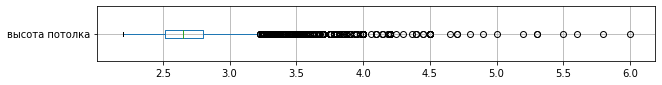

count    14468.000000
mean         2.726971
std          0.277803
min          2.200000
25%          2.517500
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

In [ ]:
# допустим что указанные данные свыше 20-ти метров ошибочно указали точку
df.loc[(df['ceiling_height'] > 20),'ceiling_height'] = df['ceiling_height'] / 10

# выведим из диапазона явно некорректные данные, т.е потолки ниже
#   2 м. (включительно) и больше например 7 м
df.loc[(df['ceiling_height'] > 0) & \
 (df['ceiling_height'] <= 2) | (df['ceiling_height'] > 7),'ceiling_height'] = -1

#
graf = df[df['ceiling_height'] > 0].boxplot('ceiling_height', vert = False, figsize = (10,1))
graf.set_yticklabels(['высота потолка'])
plt.show()
df[df['ceiling_height'] > 0]['ceiling_height'].describe()

В итоге у нас осталась выборка данных в диапазоне от 2 м до 7 м (возможно здесь указывалась высота для 2-уровневых квартир)

Выведим из изучаемого диапазона квартиры c жилой площадью меньше 8 кв.м.

In [ ]:
df.loc[(df['living_area'] > 0) & (df['living_area'] < 8),'living_area'] = -1

## Проверка предобработки данных

In [ ]:
# проверка наличие пропусков
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).round(1)

total_images             0.0
last_price               0.0
days_exposition_final    0.0
days_exposition          0.0
ponds_nearest            0.0
ponds_around_3000        0.0
parks_nearest            0.0
parks_around_3000        0.0
city_centers_nearest     0.0
airports_nearest         0.0
locality_name            0.0
balcony                  0.0
kitchen_area             0.0
open_plan                0.0
studio                   0.0
is_apartment             0.0
floor                    0.0
living_area              0.0
floors_total             0.0
ceiling_height           0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
locality_name_modify     0.0
dtype: float64

In [ ]:
# проверка типов данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   total_images           23650 non-null  int64          
 1   last_price             23650 non-null  int64          
 2   total_area             23650 non-null  float64        
 3   first_day_exposition   23650 non-null  datetime64[ns] 
 4   rooms                  23650 non-null  int64          
 5   ceiling_height         23650 non-null  float64        
 6   floors_total           23650 non-null  int64          
 7   living_area            23650 non-null  float64        
 8   floor                  23650 non-null  int64          
 9   is_apartment           23650 non-null  int64          
 10  studio                 23650 non-null  bool           
 11  open_plan              23650 non-null  bool           
 12  kitchen_area           23650 non-null  float64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'is_apartment'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>],
       [<AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'

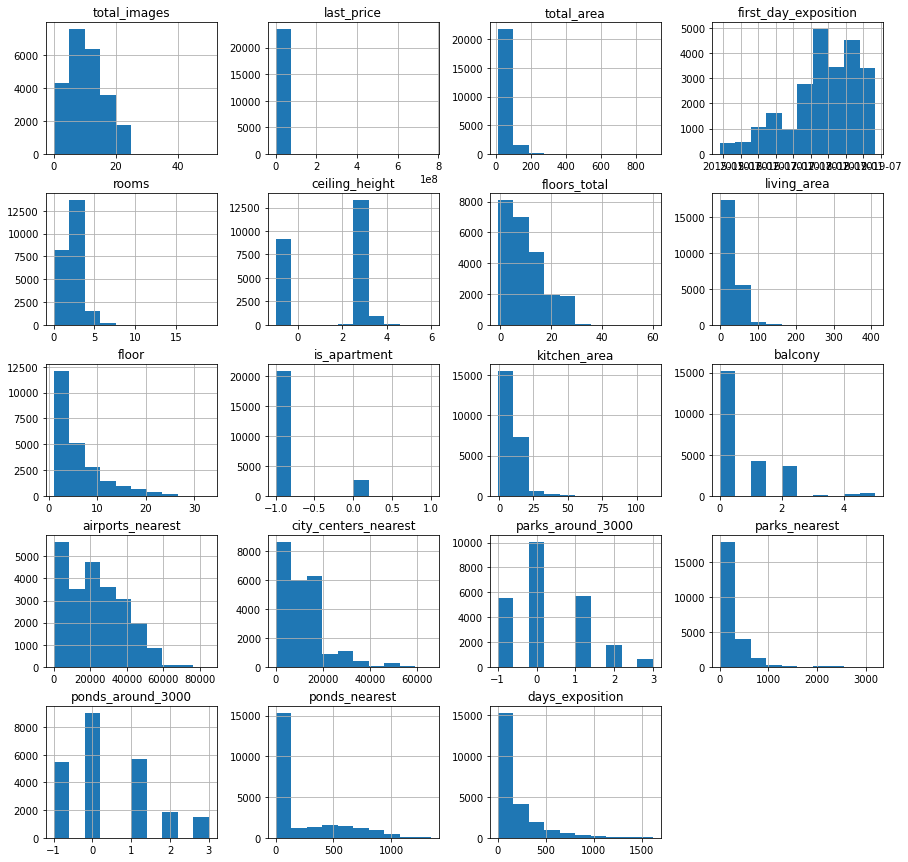

In [ ]:
df.hist(figsize=(15, 15))

процент удаленных вылетов:  0.97


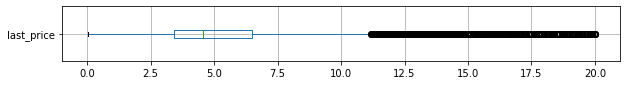

<AxesSubplot:>

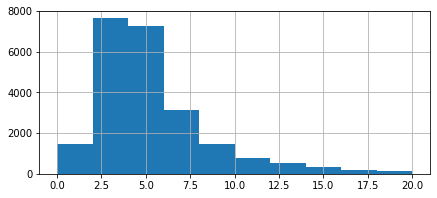

In [ ]:
# приведем стоимость к миллионам
df['last_price'] = df['last_price'] / 1000000
# ограничим выборку объявлениями стоимостью до 20 млн.
last_price_percent = round(len(df.query('last_price < 20')) / len(df['last_price']), 2 )
print('процент удаленных вылетов: ', last_price_percent)
# проверим доля удаляемых значений не превысила 10%
if last_price_percent > 0.9:
  df = df[df['last_price'] < 20]
else:
  print('процент вылетов больше 10%')

graf = df.boxplot('last_price', vert = False, figsize = (10,1))
plt.show()
df['last_price'].hist(figsize=(7, 3))

процент удаленных вылетов:  0.98


<AxesSubplot:>

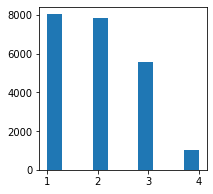

In [ ]:
# ограничим выборку квартирами до 4-х комнат
rooms_percent = round(len(df.query('rooms > 0 and rooms < 5')) / len(df['rooms']), 2 )
print('процент удаленных вылетов: ', rooms_percent)
# проверим доля удаляемых значений не превысила 10%
if rooms_percent > 0.9:
  df = df[(df['rooms'] > 0) & (df['rooms'] < 5)]
else:
  print('процент вылетов больше 10%')

df['rooms'].hist(figsize=(3, 3), grid = False, bins = 10)

процент удаленных вылетов:  1.0


<AxesSubplot:>

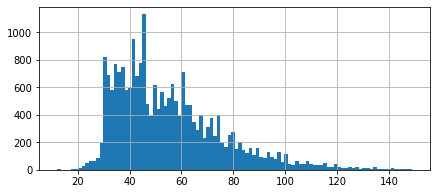

In [ ]:
# ограничим выборку квартирами с площадью  от 8-ми до 150 кв.м.
area_percent = round(len(df.query('total_area > 8 and total_area < 150')) / len(df['total_area']), 2 )
print('процент удаленных вылетов: ', area_percent)
# проверим доля удаляемых значений не превысила 10%
if area_percent > 0.9:
  df = df[(df['total_area'] > 8) & (df['total_area'] < 150)]
else:
  print('процент вылетов больше 10%')

df['total_area'].hist(figsize=(7, 3), bins = 100)

# Посчитайте и добавьте в таблицу новые столбцы

## Стоимость квадратного метра

In [ ]:
# расчитаем стоимость квадратного метра
df['price_square_meter'] = (df['last_price'] / df['total_area'] * 1000000).astype('int')
display(df[['last_price', 'total_area', 'price_square_meter']])

,last_price,total_area,price_square_meter
0,13.000,108.00,120370
1,3.350,40.40,82920
2,5.196,56.00,92785
4,10.000,100.00,100000
5,2.890,30.40,95065
...,...,...,...
23694,9.700,133.81,72490
23695,3.100,59.00,52542
23696,2.500,56.70,44091
23697,11.475,76.75,149511


## День, месяц и год публикации объявления

In [ ]:
# день недели публикации объявления
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

# месяц публикации
df['exposition_month'] = df['first_day_exposition'].dt.month

# год публикации
df['exposition_year'] = df['first_day_exposition'].dt.year

# проверка
display(df[['first_day_exposition','exposition_weekday','exposition_month','exposition_year']])

,first_day_exposition,exposition_weekday,exposition_month,exposition_year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
4,2018-06-19,1,6,2018
5,2018-09-10,0,9,2018
...,...,...,...,...
23694,2017-03-21,1,3,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


## Тип этажа квартиры

In [ ]:
# Категоризация этажей
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_category'] = df.apply(floor_category, axis=1)

# проверка
display(df[['floor', 'floors_total', 'floor_category']].sample(15))
print(df['floor_category'].value_counts())

,floor,floors_total,floor_category
21688,21,24,другой
19433,1,5,первый
20166,2,5,другой
20339,1,5,первый
15162,16,16,последний
3867,11,24,другой
6013,3,5,другой
22202,2,16,другой
21738,2,5,другой
8175,4,5,другой


другой       16447
последний     3095
первый        2796
Name: floor_category, dtype: int64


## Расстояние до центра города в километрах

In [ ]:
# добавим новую ячейку city_centers_nearest_km
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)

# проверяем
display(df[['city_centers_nearest', 'city_centers_nearest_km']].sample(15))

,city_centers_nearest,city_centers_nearest_km
19032,1117,1.0
21067,31036,31.0
4122,23384,23.0
6312,8460,8.0
16388,12082,12.0
11417,8476,8.0
7429,-1,-0.0
4192,-1,-0.0
1748,10364,10.0
20006,12635,13.0


# Проведите исследовательский анализ данных

## 1. Изучаем основные параметры
*   общая площадь
*   жилая площадь
*   площадь кухни
*   цена объекта
*   количество комнат
*   высота потолков
*   этаж квартиры
*   тип этажа квартиры («первый», «последний», «другой»)
*   общее количество этажей в доме
*   расстояние до центра города в метрах
*   расстояние до ближайшего аэропорта
*   расстояние до ближайшего парка
*   день и месяц публикации объявления

### Общая площадь, жилая площадь, площадь кухни и количество комнат

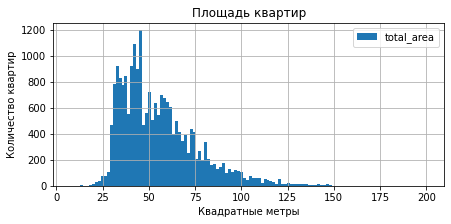

In [ ]:
# отобразим распределение общей площади квартир
df.plot(y = 'total_area', kind = 'hist', grid = True, \
        figsize = (7,3), bins = 120, range=(8,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
#print('Наибольшие по площади варианты:')
#print(df['total_area'].sort_values(ascending=False).head(10))

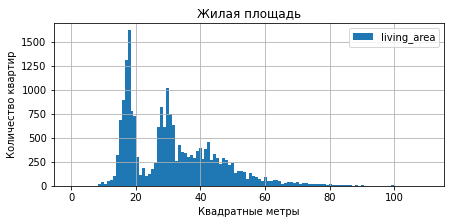

In [ ]:
# отобразим распределение жилой площади
df.plot(y = 'living_area', kind = 'hist', grid = True, \
        figsize = (7,3), bins = 120, range=(0,110))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

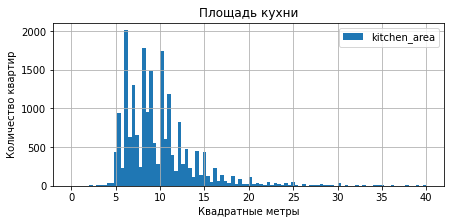

In [ ]:
# отобразим распределение площади кухни
df.plot(y = 'kitchen_area', grid = True, kind = 'hist', figsize = (7,3),
         bins = 100, range=(0,40))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

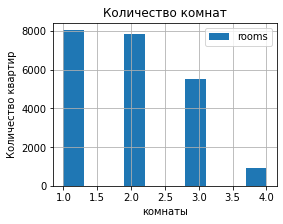

In [ ]:
df.plot(y = 'rooms', kind = 'hist', grid=True, figsize = (4,3),
        bins = 10)
plt.title('Количество комнат')
plt.xlabel('комнаты')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
df.loc[(df['living_area'] > 0) &
       (df['kitchen_area'] > 0)][['total_area', 'living_area', 'kitchen_area', 'rooms']].describe()

,total_area,living_area,kitchen_area,rooms
count,19986.000000,19986.000000,19986.000000,19986.000000
mean,55.533669,31.663352,9.956784,1.983939
std,20.688994,14.158127,4.489629,0.880610
min,14.000000,8.000000,1.300000,1.000000
25%,40.000000,18.500000,7.000000,1.000000
50%,51.000000,30.000000,9.000000,2.000000
75%,66.300000,41.000000,11.300000,3.000000
max,149.000000,128.000000,64.000000,4.000000


*   Диапазон общей площади квартир в выборке от 14 до 900 кв. метров. Характерная форма распределения Пуассона с медианой 51.2 кв.м. и средним 56.3 кв.м.
*   На графике заметны пики в районе 40, 60 и 75, что вероятно соответствует количествам комнат в квартире
*   Так же форма распределения Пуассона характерны и для распределений жилой площади и площади кухни
*   Так же заметны пики в распределении жилой площади соответствующие однокомнатным, двухкомнатным и трехкомнатным квартирам
*   В основной массе объявлений продаются однокомнатные и двухкомнатные кваритиры, на претьем месте - трехкомнатные




### Цена объекта

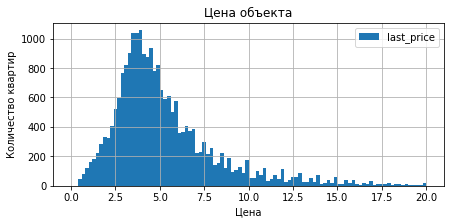

count    22338.000000
mean         5.300918
std          3.020297
min          0.012190
25%          3.400000
50%          4.500000
75%          6.390000
max         19.999000
Name: last_price, dtype: float64

In [ ]:
df.plot(y = 'last_price', kind = 'hist', grid=True, figsize = (7,3),
        bins = 100 )
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
df['last_price'].describe()



*   Форма распределение цен на недвижимость имеет нормальное распределение (Гаусса). Среднее значение в 6,5 млн руб., медиана 4,6 млн руб.



### Высота потолков

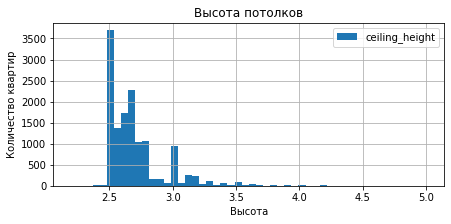

count    13631.000000
mean         2.701963
std          0.244990
min          2.200000
25%          2.500000
50%          2.640000
75%          2.780000
max          5.300000
Name: ceiling_height, dtype: float64

In [ ]:
df.plot(y = 'ceiling_height', kind = 'hist', grid=True, figsize = (7,3),
        bins = 50, range = (2.2,5))
plt.title('Высота потолков')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()
df[(df['ceiling_height'] > 2)]['ceiling_height'].describe()

*   Высота потолков в среднем составляет 2,7 м, медиана 2,65 м.
*   Так же есть квартиры с 3-хметровыми потолками и выше предположительно принадлежащие квартирам в историческом центре и внеплановой застройки



### Этаж квартиры, общее количество этажей в доме и тип этажа квартиры

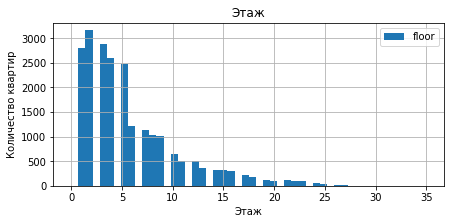

count    22338.000000
mean         5.900439
std          4.892380
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [ ]:
df.plot(y = 'floor', kind = 'hist', grid=True, figsize = (7,3),
        bins = 50, range = (0,35))
plt.title('Этаж')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
df[(df['floor'] > 0)]['floor'].describe()

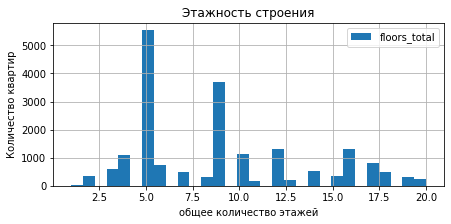

count    22260.000000
mean        10.749102
std          6.612532
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
df.plot(y = 'floors_total', kind = 'hist', grid=True, figsize = (7,3),
        bins = 30, range = (1,20))
plt.title('Этажность строения')
plt.xlabel('общее количество этажей')
plt.ylabel('Количество квартир')
plt.show()
df[(df['floors_total'] > 0)]['floors_total'].describe()

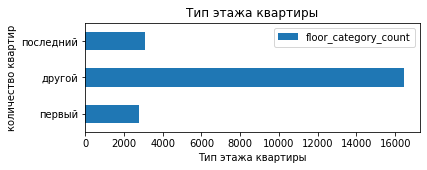

,floor_category_count
floor_category,
первый,2796
другой,16447
последний,3095


In [ ]:
floor_category_graf = pd.DataFrame()
floor_category_graf['floor_category_count'] = df.groupby('floor_category')['floor_category'].count()
floor_category_graf = floor_category_graf.reindex(['первый', 'другой', 'последний'])

ax = floor_category_graf.plot.barh(figsize = (6,2))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('количество квартир')
plt.show()
display(floor_category_graf)

Выводы
*   Этаж квартиры и общее количество этажей имеют распределение Гаусса со средним 6 и медианной 4.
*   На графике этажности строений заметны пики характерных значений этажности типовой застройки - 5 этажей и 9 этажей
*   Ожидаемо количество квартир в категории "другой" больше чем первый и последний. Интересно что в категории "первый" квартир меньше чев в "последний". Возможно из-за того что на перых этажах часто распологаются магазины, бытовые и социальные учреждения.


### Расстояния до центра города, ближайшего аэропорта и парка

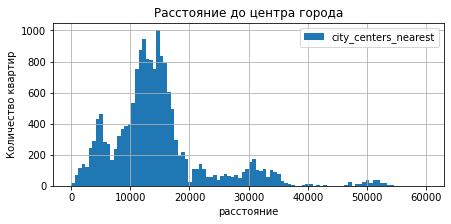

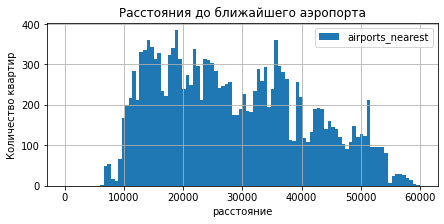

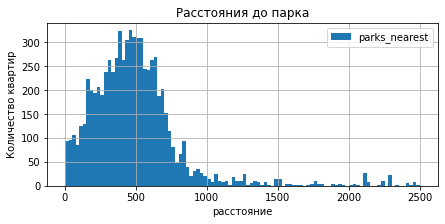

,city_centers_nearest,airports_nearest,parks_nearest
count,7280.000000,7280.000000,7280.000000
mean,13002.974451,28784.322527,495.546978
std,8747.143152,12249.551670,343.917685
min,208.000000,6914.000000,1.000000
25%,7775.250000,19375.000000,291.000000
50%,11738.000000,27102.000000,458.000000
75%,14985.000000,37364.000000,616.000000
max,61495.000000,73391.000000,3190.000000


In [ ]:
df.plot(y = 'city_centers_nearest', kind = 'hist', grid = True, figsize = (7,3),
        bins = 100, range = (1,60000))
plt.title('Расстояние до центра города')
plt.xlabel('расстояние')
plt.ylabel('Количество квартир')
plt.show()

df.plot(y = 'airports_nearest', kind = 'hist', grid = True, figsize = (7,3),
        bins = 100, range = (1,60000))
plt.title('Расстояния до ближайшего аэропорта')
plt.xlabel('расстояние')
plt.ylabel('Количество квартир')
plt.show()

df.plot(y = 'parks_nearest', kind = 'hist', grid = True, figsize = (7,3),
        bins = 100, range = (1,2500))
plt.title('Расстояния до парка')
plt.xlabel('расстояние')
plt.ylabel('Количество квартир')
plt.show()

df.loc[(df['city_centers_nearest'] > 0) & (df['airports_nearest'] > 0) &
       (df['parks_nearest'] > 0)][['city_centers_nearest', 'airports_nearest', 'parks_nearest']].describe()


*   Интересные пики на графике распределения расстояний до центра. Возможно они отражают границы разных агломераций построек: исторический центр от новых районов с многоквартирными домами
*   На графике явно видно отсутствие предложений ближе 7км от аэропорта
*   В подавляющем большинстве на расстоянии около полукилометра находится парк

### День и месяц публикации объявления

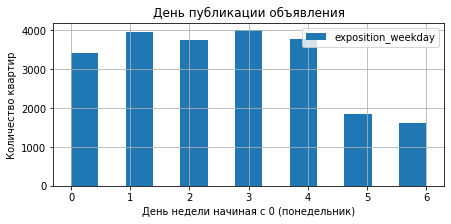

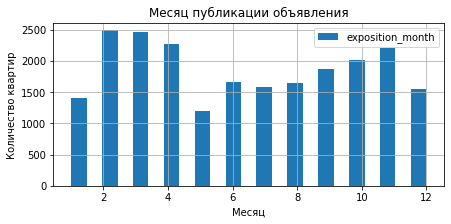

In [ ]:
df.plot(y = 'exposition_weekday', kind = 'hist', grid=True, figsize = (7,3),
        bins = 13)
plt.title('День публикации объявления')
plt.xlabel('День недели начиная с 0 (понедельник)')
plt.ylabel('Количество квартир')
plt.show()

df.plot(y = 'exposition_month', kind = 'hist', grid=True, figsize = (7,3),
        bins = 23)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Выводы
*   На графике "День публикации объявления" явно видно двукратное уменьшение количества подачи объявлений в выходные дни (на графике: 5 суббота, 6 - воскресенье)
*   А на графике "Месяц публикации объявления" заметно максимальное количество подачи объявлений в феврале, марте и апреле затем минимальный уровень в мае с достаточно плавным возрастанием вплоть до ноября. В декабре и январе так же количество объявлений сильно падает.   



## Изучение скорости продажи квартир

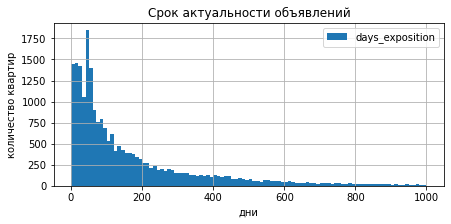

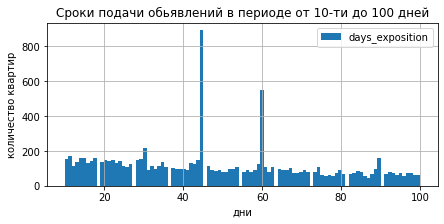

count    22318.000000
mean       179.817188
std        225.472037
min          1.000000
25%         42.000000
50%         92.000000
75%        228.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [ ]:
df[(df['days_exposition'] > 0)].plot(y = 'days_exposition', kind = 'hist', grid=True,
                                     figsize = (7,3), bins = 100, range = (1,1000))
plt.title('Срок актуальности объявлений')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

df[(df['days_exposition'] > 0)].plot(y = 'days_exposition', kind = 'hist', grid=True,
                                     figsize = (7,3), bins = 100, range = (10,100))
plt.title('Сроки подачи обьявлений в периоде от 10-ти до 100 дней')
plt.xlabel('дни')
plt.ylabel('количество квартир')
plt.show()

df[(df['days_exposition'] > 0)]['days_exposition'].describe()

*   Распределение по времени продажи имеет форму распределение Пуассона. Среднее время продажи квартиры составляет почти ровно полгода - 186 дней, медианное - 94 дня. Больше всего квартир (до 75%) продаётся в срок до 240 дней.
*   На графике видны пики в районе 45-го, 60-го и 90-го дня с момента публикации. Можно предположить что это связано с механикой публикации объявлений на площадке Яндекс.Недвижимость.

## Изучение факторов больше всего влияющие на общую стоимость объекта.

Изучим какие факторы больше всего влияют на стоимость квартиры: площадь, число комнат, этаж (первый или последний), удалённость от центра, а так же дата размещения объявления. Для этого определим степень корреляции и построим графики.

Что бы исключить специфические предложения с выпадами в параметрах цены и площади, ограничим выборку квартирами площадью до 200 кв. м. и стоимостью до 20 млн. руб.

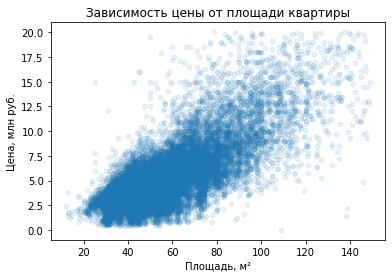

Корреляция цены квартиры и общей площади: 0.76


In [ ]:
price_area = df[['total_area', 'last_price']]
price_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
plt.title('Зависимость цены от площади квартиры')
plt.xlabel('Площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.show()
print('Корреляция цены квартиры и общей площади:', price_area['last_price'].corr(price_area['total_area']).round(2))

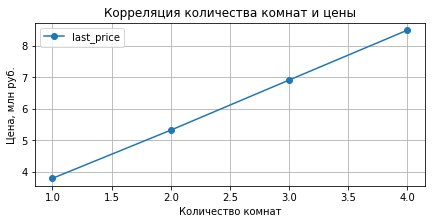

Корреляция цены квартиры и числа комнат: 0.45


In [ ]:
price_room = df[['rooms', 'last_price']]
price_room = price_room.pivot_table(index = 'rooms', values = 'last_price')
price_room.plot(y = 'last_price', style='o-', figsize = (7,3), grid = True )
plt.title('Корреляция количества комнат и цены')
plt.xlabel('Количество комнат')
plt.ylabel('Цена, млн руб.')
plt.show()
print('Корреляция цены квартиры и числа комнат:', df['rooms'].corr(df['last_price']).round(2))

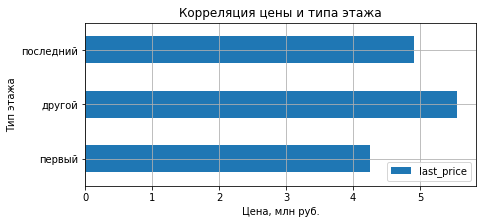

In [ ]:
price_floor = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'mean')
price_floor = price_floor.reindex(['первый', 'другой', 'последний'])
price_floor.plot(y = 'last_price', kind='barh', figsize = (7,3), grid = True )
plt.title('Корреляция цены и типа этажа')
plt.xlabel('Цена, млн руб.')
plt.ylabel('Тип этажа')
plt.show()

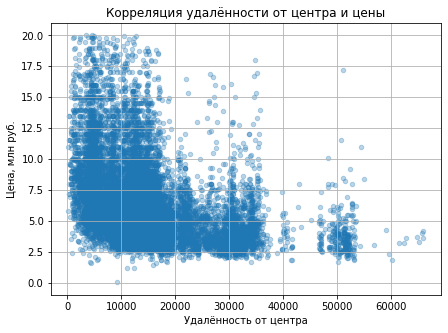

Корреляция удалённости от центра и цены квартиры -0.35


In [ ]:
price_city_center = df[(df['city_centers_nearest'] > 0)]
price_city_center.plot(y = 'last_price', x = 'city_centers_nearest', kind = 'scatter',
        figsize = (7,5), grid = True, alpha = 0.3)
plt.title('Корреляция удалённости от центра и цены')
plt.xlabel('Удалённость от центра')
plt.ylabel('Цена, млн руб.')
plt.show()
print('Корреляция удалённости от центра и цены квартиры',
      price_city_center['city_centers_nearest'].corr(price_city_center['last_price']).round(2))


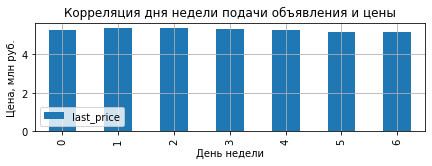

Корреляция дня недели подачи объявления и цены квартиры -0.02


In [ ]:
price_day = df.pivot_table(index = 'exposition_weekday', values = 'last_price', aggfunc = 'mean')
price_day.plot(y = 'last_price', kind='bar', figsize = (7,2), grid = True )
plt.title('Корреляция дня недели подачи объявления и цены')
plt.xlabel('День недели')
plt.ylabel('Цена, млн руб.')
plt.legend(loc='lower left')
plt.show()
print('Корреляция дня недели подачи объявления и цены квартиры',
      df['last_price'].corr(df['exposition_weekday']).round(2))

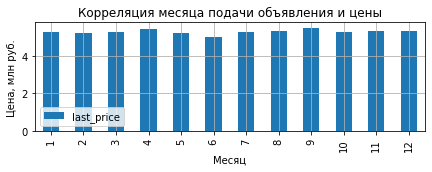

Корреляция месяца подачи объявления и цены квартиры 0.01


In [ ]:
price_month = df.pivot_table(index = 'exposition_month', values = 'last_price', aggfunc = 'mean')
price_month.plot(y = 'last_price', kind='bar', figsize = (7,2), grid = True )
plt.title('Корреляция месяца подачи объявления и цены')
plt.xlabel('Месяц')
plt.ylabel('Цена, млн руб.')
plt.legend(loc='lower left')
plt.show()
print('Корреляция месяца подачи объявления и цены квартиры',
      df['last_price'].corr(df['exposition_month']).round(2))

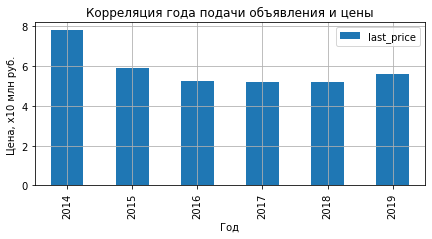

Корреляция года объявления и цены квартиры -0.01788151008164454


In [ ]:
price_year = df.pivot_table(index = 'exposition_year', values = 'last_price', aggfunc = 'mean')
price_year.plot(y = 'last_price', kind='bar', figsize = (7,3), grid = True )
plt.title('Корреляция года подачи объявления и цены')
plt.xlabel('Год')
plt.ylabel('Цена, x10 млн руб.')
plt.show()
print('Корреляция года объявления и цены квартиры',
      df['last_price'].corr(df['exposition_year']))


Выводы

*   Больше всего на цену квартиры влияет площадь квартиры, **чем больше площадь, тем больше цена**,
*   Аналогично с ценой квартиры хорошо коррелируется с числом комнат, **чем больше комнат тем больше цена**, что естественно - бельше комнат больше площадь.
*   Корреляция цены с расстоянием от центра обратная, то есть - **чем дальше от  центра, тем дешевле квартира**.
*   **Цена квартиры** очевидно **растет с типом этажа**: квартиры   на первом этаже ощутимо дешевле квартир на последнем этаже.
*   **Цены квартир** опубликованные в **разные дни недели**, **и в разные месяцы практически не коррелируются**
*   **С 2014 до 2018 года цены на квартиры по объявлениям снижаются. В 2019 году наблюдается небольшой рост**

## Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Список 10-ти населенных пунктов по количеству объявлений :


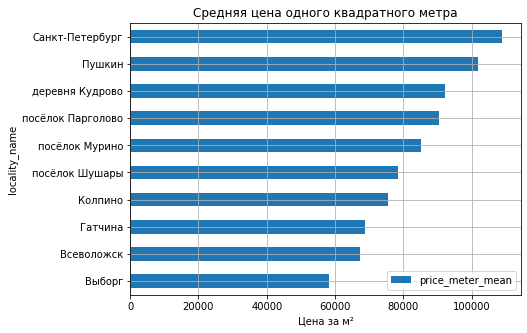

,total_price_mean,count_notice,price_meter_mean
locality_name,,,
Санкт-Петербург,6.289989,14569.0,108889.868488
Пушкин,5.762924,354.0,101955.898305
деревня Кудрово,4.334467,283.0,92296.731449
посёлок Парголово,4.503557,322.0,90447.987578
посёлок Мурино,3.734949,493.0,85120.012170
посёлок Шушары,4.105820,434.0,78438.135945
Колпино,3.848237,335.0,75420.295522
Гатчина,3.474152,306.0,68797.238562
Всеволожск,3.756634,390.0,67200.797436


In [ ]:
# Создаем сводную таблицу
locality_top = df.pivot_table(index = 'locality_name', values = ['last_price', 'price_square_meter'],
    aggfunc = {'last_price': 'mean', 'price_square_meter': ['count', 'mean']})
# переименуем столбцы
locality_top.columns = ['total_price_mean', 'count_notice', 'price_meter_mean']
# Отсортируем 10 паселённых пунктов по количеству объявлений
locality_top = locality_top.sort_values(by='count_notice', ascending = False).head(10)
# Отсортируем по цене за кв. м.
locality_top = locality_top.sort_values(by='price_meter_mean', ascending = True)
print('Список 10-ти населенных пунктов по количеству объявлений :')
locality_top.plot(y = 'price_meter_mean', kind='barh', figsize = (7,5), grid = True )
plt.title('Средняя цена одного квадратного метра')
plt.xlabel('Цена за м²')
plt.show()
locality_top = locality_top.sort_values(by='price_meter_mean', ascending = False)
locality_top

*   Ожидаемо, самая высокая средняя стоимость квадратного метра жилья в Санкт-Петербурге
*   Следом идет город Пушкин. Замыкает десятку город Выборг.

## Расчет стоимости квадратного метра относительно удаленности от центра в г.Санкт-Петербурге

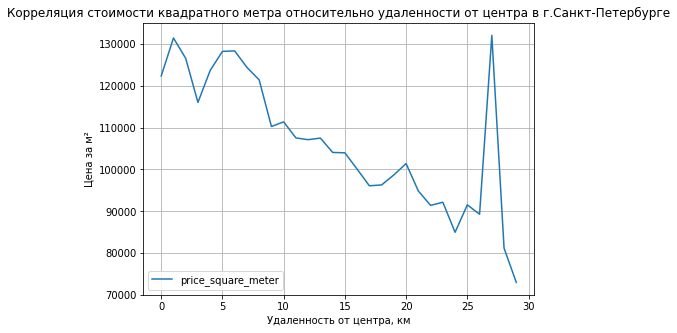

Корреляция стоимости квадратного метра и удаленности от центра 0.57


In [ ]:
estate_piter = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest >= 0')
estate_piter = estate_piter.pivot_table(index = 'city_centers_nearest_km', values = 'price_square_meter')
estate_piter.plot(y = 'price_square_meter', grid = True, figsize = (7,5))
plt.title('Корреляция стоимости квадратного метра относительно удаленности от центра в г.Санкт-Петербурге')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Цена за м²')
plt.show()
print('Корреляция стоимости квадратного метра и удаленности от центра',
      (df['city_centers_nearest'] > 0).corr(df['price_square_meter']).round(2))

Вывод
*   Расчеты показали что стоимость квадратного метра в Санкт-Петербурге заметно коррелирует с удаленностью от центра города: в среднем, чем дальше от центра, тем ниже стоимость квадратного метра



# Общий вывод

После проведения исследовательского анализа над предоставленными данными можно сделать следующие выводы:
*   Сильнее  всего на стоимость квартиры влияет площадь квартиры и число комнат соответственно.
*   Стоимость кадратного метра в Санкт Петербурге зависит от удаления от центра города
*   Цена квартиры очевидно растет с типом этажа: квартиры на первом этаже ощутимо дешевле квартир на последнем этаже.
*   В выходные дни наблюдается двукратное уменьшение количества подачи объявлений.
*   По месяцам: заметно максимальное количество подачи объявлений в феврале, марте и апреле затем минимальный уровень в мае с достаточно плавным возрастанием вплоть до ноября. В декабре и январе так же количество объявлений сильно падает.
*   Цены на квартиры снижаются с 2014 по 2018 год, с 2019 года начинается незначительный рост.
*   Самая высокая средняя стоимость квадратного метра жилья в Санкт-Петербурге
Следом идет город Пушкин. Замыкает десятку город Выборг.
